In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

# CHANGE
X = np.array([
    [1.2, 3.1],
    [1.5, 2.8],
    [2.0, 3.5],
    [2.2, 1.0],
    [2.8, 1.2],
    [3.0, 3.8],
    [3.5, 4.2],
    [4.0, 6.1],
    [4.2, 5.8],
    [5.0, 7.0]
])
y = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])
# change n_estimators (# trees) & random state
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
# CHANGE

regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X, y)
predictions = regressor.predict(X)

mse_metric = mse(y, predictions)
print(f'mse (tr): {mse_metric}')

X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)  # Only the first feature
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 1))))  # Pad with zeros

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")  
plt.title("Random Forest Regression Results")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

TypeError: RandomForestRegressor.__init__() takes from 1 to 2 positional arguments but 3 were given

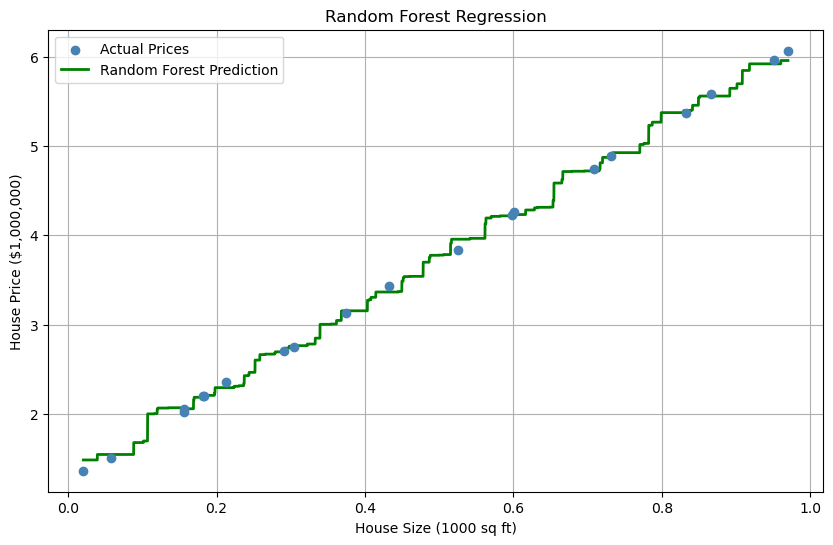

MSE: 0.006040924289936788


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

# CHANGE RANDOM STATE
rng = np.random.RandomState(42)
house_sizes = rng.rand(20)
prices = house_sizes * 5 + 1.2 + rng.rand(len(house_sizes)) / 10

X = house_sizes.reshape(-1, 1)
y = prices                    

regressor_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor_rf.fit(X, y)

house_size_range = np.linspace(house_sizes.min(), house_sizes.max(), 10000).reshape(-1, 1)
predicted_prices_rf = regressor_rf.predict(house_size_range)

plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, prices, color='steelblue', label='Actual Prices', zorder=5)
plt.plot(house_size_range, predicted_prices_rf, color='green', lw=2, label='Random Forest Prediction')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('House Price ($1,000,000)')
plt.title('Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()

# Predicting on New Data
new_house_sizes = rng.rand(10) 
new_prices = new_house_sizes * 5 + 1.2 + rng.rand(len(new_house_sizes)) / 10
predicted_new_prices = regressor_rf.predict(new_house_sizes.reshape(-1,1))

print(f'MSE: {mse(new_prices, predicted_new_prices)}')


# Explanation:
# The Random Forest predicts the price by averaging the predictions from multiple decision trees.
# This ensemble approach reduces the instability and variance associated with a single decision tree.